<a href="https://colab.research.google.com/github/Nayr91/Codecademy/blob/master/life_expectancy_gdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [158]:
## Read in Data
life = pd.read_csv("all_data.csv")
print(life.head())

## Describe Data
life.describe()
life.dtypes


  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

# **Analysis of the Life Expectancy and GDP for 6 countries**

Goals:

1. Observe life expectancy as a trend over the 15 year span of 2000 - 2015 for each country - Has this changed?
2. Look for correlation between GPD and life expectancy, does lower GDP mean shorter life expectancy?
3. Does Population density play a role in life expectancy?



**Null Hypothesis**

---

1. Life Expectancy Trend
  - The life expectancy hasn't changed over the period
  - The life expectancy has changed up or down over the period

2. Means of life expectancy and GDP
  - There is no trend between life expectancy and GDP
  - There is a trend between life expentancy and GDP either positive or negative

3. Population density
  - Population density does not impact life expectancy
  - Population density has an impact on life expectancy




**Exploratory Data Analysis**
---

In [159]:
life.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

In [160]:
life.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

Table 1 - Means of the GPD for each Country
____________________________________________
Country
Chile                       1.697888e+11
China                       4.957714e+12
Germany                     3.094776e+12
Mexico                      9.766506e+11
United States of America    1.407500e+13
Zimbabwe                    9.062580e+09
Name: GDP, dtype: float64


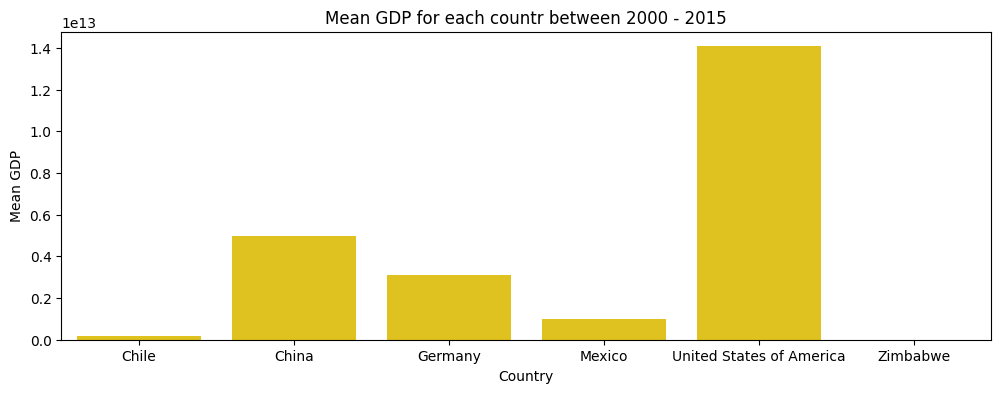

<Figure size 640x480 with 0 Axes>

In [161]:
gpd_means = life.groupby('Country').GDP.mean()
plt.figure(figsize=(12, 4))
print('Table 1 - Means of the GPD for each Country')
print('____________________________________________')
print(gpd_means)
sns.barplot(gpd_means, color='gold')
plt.ylabel('Mean GDP')
plt.title('Mean GDP for each countr between 2000 - 2015')
plt.show()
plt.clf()

Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: Life expectancy at birth (years), dtype: float64


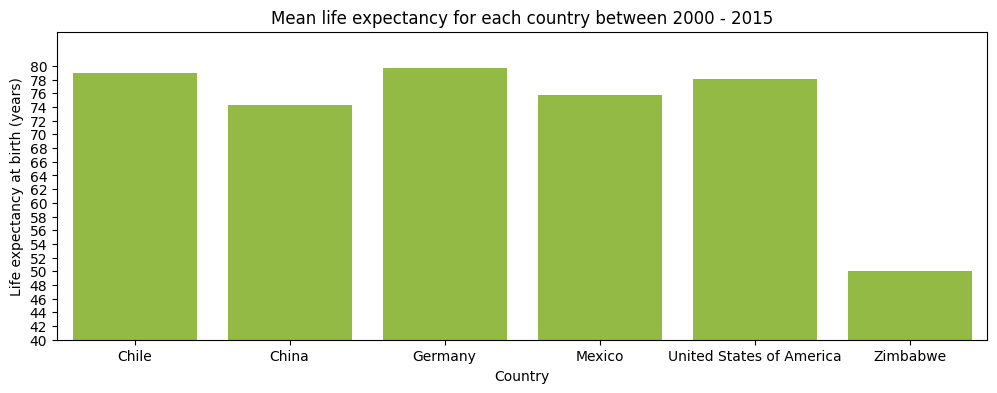

<Figure size 640x480 with 0 Axes>

In [162]:
life_means = life.groupby('Country')['Life expectancy at birth (years)'].mean()
print(life_means)
plt.figure(figsize=(12, 4))
y_ticks_range = range(40, 82, 2)
plt.yticks(y_ticks_range)
plt.title('Mean life expectancy for each country between 2000 - 2015')
plt.ylim(40, 85)
sns.barplot(life_means, color = 'yellowgreen')
plt.show()
plt.clf()

# **1. Life expectancy trends**

---

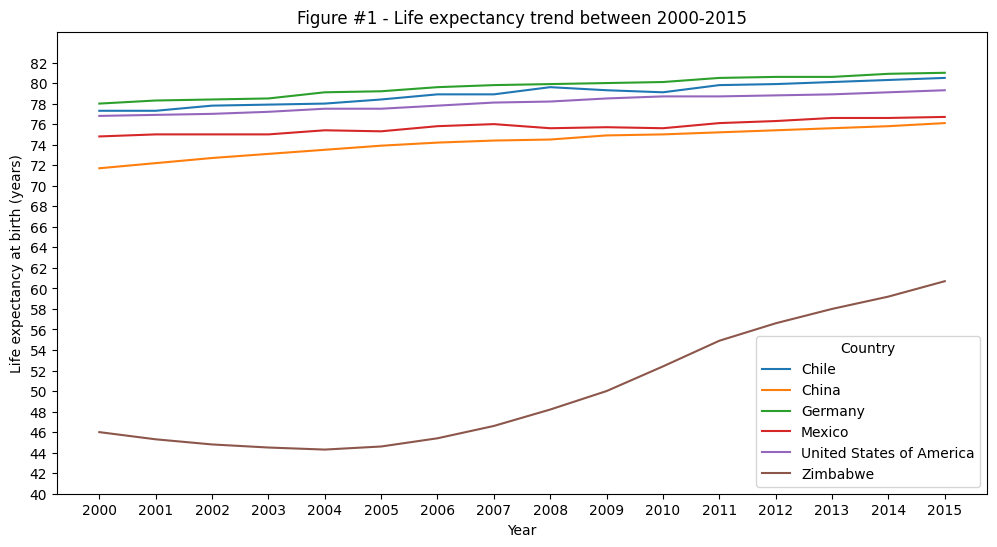

<Figure size 640x480 with 0 Axes>

In [163]:
# Plot for Figure 1
plt.figure(figsize=(12, 6))
sns.lineplot(data = life, y = 'Life expectancy at birth (years)', x ='Year', hue='Country')
y_ticks_range = range(40, 83  , 2)
plt.yticks(y_ticks_range)
plt.title('Figure #1 - Life expectancy trend between 2000-2015')
plt.ylim(40, 85)
plt.xticks(range(2000, 2016, 1))
plt.show()
plt.clf()

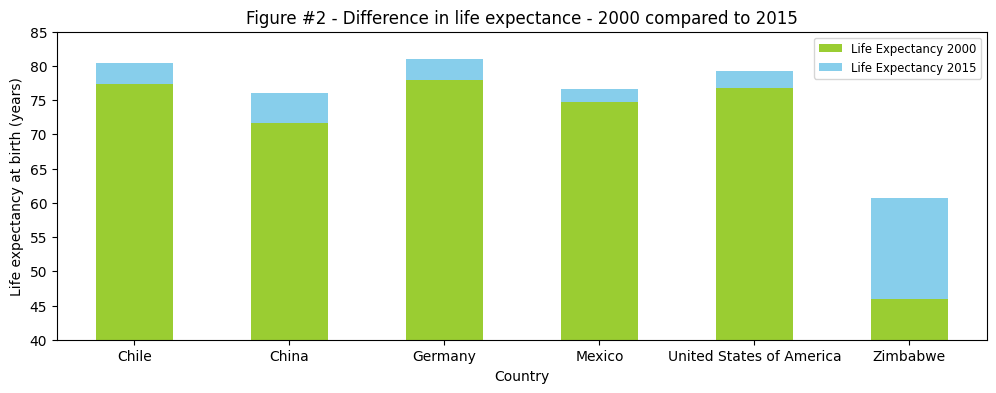

<Figure size 640x480 with 0 Axes>

In [188]:

# Creating a customer df with 2 columns, 1 for the life expectancy in the year 2000 and the
# second column showing the difference between column 1 and the variable in the year 2015
e_2000 = list(life[life.Year == 2000]['Life expectancy at birth (years)'])
e_2015 = list(life[life.Year == 2015]['Life expectancy at birth (years)'])
difference = []
for i in range(len(e_2015)):
  difference.append(e_2015[i] - e_2000[i])

together = list(zip(e_2000, difference))

difference_df = pd.DataFrame(
    np.array(together), life.Country.unique(),
    columns = ['expected_2000', 'expected_2015']
)

# Plot for Figure 2
difference_df.plot(kind='bar', stacked=True, color=['yellowgreen', 'skyblue'], figsize=(12, 4))
plt.ylim(40, 85)
plt.title('Figure #2 - Difference in life expectance - 2000 compared to 2015')
plt.ylabel('Life expectancy at birth (years)')
plt.xlabel('Country')
plt.tick_params(axis = 'x', rotation=0.0)
plt.legend(['Life Expectancy 2000', 'Life Expectancy 2015'], fontsize='small')
plt.show()
plt.clf()





**Observations**

---

Across the time line, you can see there has been a slight positive trend in life expectancy over the 15 year period. Figure 1 shows the full trend and all lines increase. In figure 2 you can see the comparative difference in the life expectancy at birth between records from 2000 against records from 2015. The blue represents the improvement over this time. Taking a closer look specifically at Zimbabwe, you can see there was a slight dip in the life expectancy around 2002 to 2006. Upon further investigation, I have been able to discover there was a food shortage in Zimbabwe during this time (source: https://www.bbc.co.uk/news/world-africa-14113618). This would explain the struggles the country would have experienced at this time and why the trend dipped.

With this in mind, I believe the null hypothesis of 'Life expectancy has not changed over this period' has sufficiently been disproved. There has been a clear improvement in life expectancy across all 6 countries in this time period.


# **2. Correlation between GDP and Life Expectancy**

---

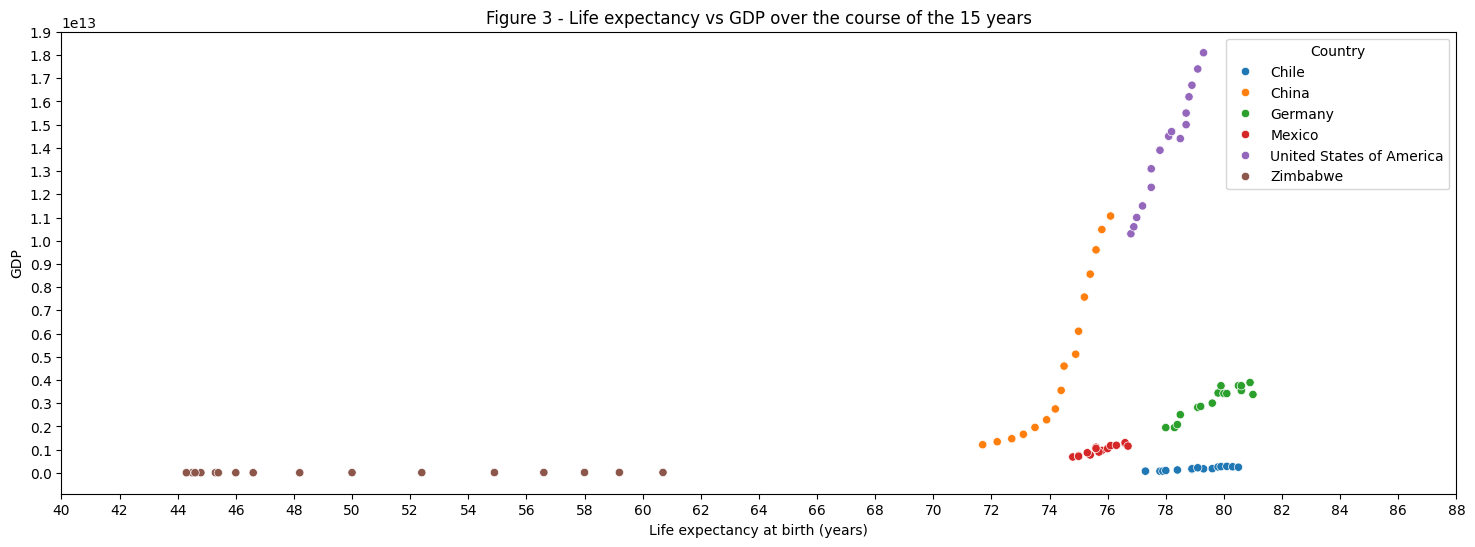

<Figure size 640x480 with 0 Axes>

In [189]:
# Plot for Figure 3
f, ax = plt.subplots(1, 1, figsize=(18, 6))
sns.scatterplot(data=life, y='GDP', x='Life expectancy at birth (years)', hue='Country', ax=ax)
plt.xticks(range(40, 90, 2))
plt.title('Figure 3 - Life expectancy vs GDP over the course of the 15 years')
plt.yticks(range(0, 20000000000000, 1000000000000))

plt.show()
plt.clf()


In [193]:
# Using DF from point 1, adding column for percentage difference between 2000 and 2015
difference_df['Percentage Increase'] = round((difference_df['expected_2015']/ (difference_df['expected_2000'] + difference_df['expected_2015']))*100, 2)

Table 2 - Life expectancy difference between 2000 and 2015 and the percentage of increase
__________________________________________________________________________________________
                          2000  Difference in 2015  Percentage Increase
Chile                     77.3                 3.2                 3.98
China                     71.7                 4.4                 5.78
Germany                   78.0                 3.0                 3.70
Mexico                    74.8                 1.9                 2.48
United States of America  76.8                 2.5                 3.15
Zimbabwe                  46.0                14.7                24.22


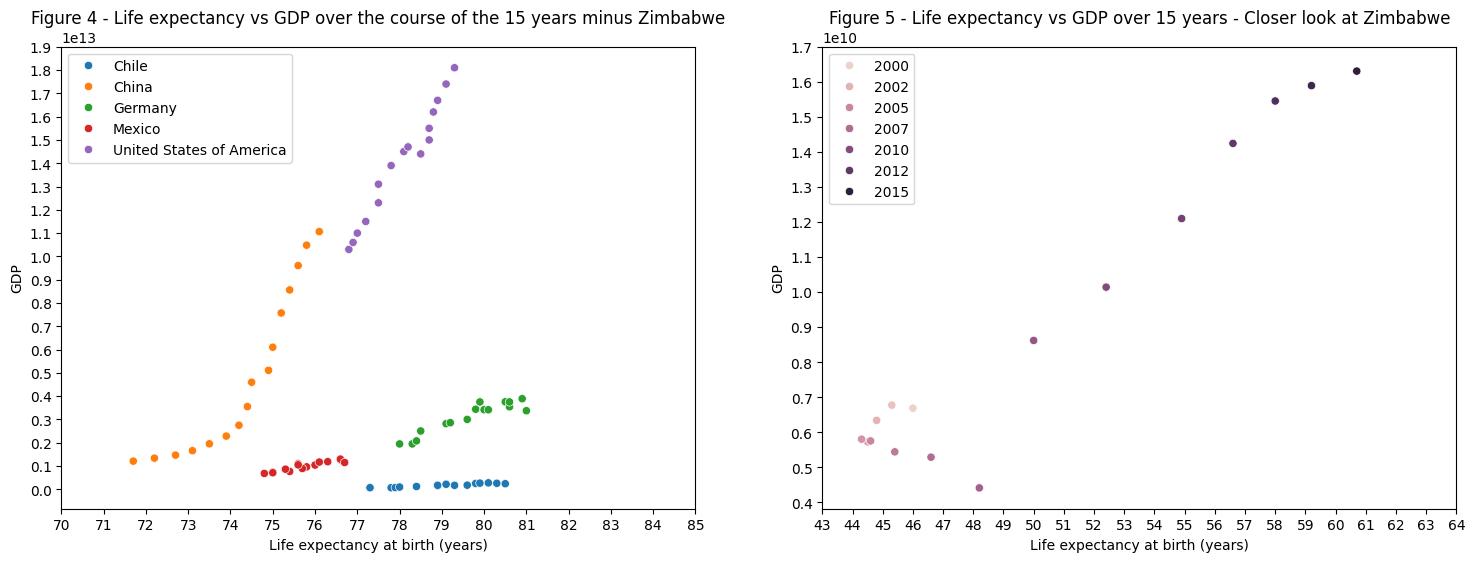

<Figure size 640x480 with 0 Axes>

In [194]:

difference_df.columns=['2000', 'Difference in 2015', 'Percentage Increase']
print('Table 2 - Life expectancy difference between 2000 and 2015 and the percentage of increase')
print('__________________________________________________________________________________________')
print(difference_df.head(6))
df_minus_zim = life[life.Country != 'Zimbabwe']

# Setting up subplots
f, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plot for Figure 4
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_minus_zim, y='GDP', x='Life expectancy at birth (years)', hue='Country', ax=ax[0])
plt.xticks(range(70, 86, 1))
plt.title('Figure 4 - Life expectancy vs GDP over the course of the 15 years minus Zimbabwe')
plt.yticks(range(0, 20000000000000, 1000000000000))
plt.legend(loc='upper left')

# Plot for Figure 5
plt.subplot(1, 2, 2)
sns.scatterplot(data=life[life.Country=='Zimbabwe'], y='GDP', x='Life expectancy at birth (years)', hue='Year', ax=ax[1])
plt.xticks(range(43, 65, 1))
plt.legend(loc='upper left')
plt.yticks(range(4000000000, 18000000000, 1000000000))
plt.title('Figure 5 - Life expectancy vs GDP over 15 years - Closer look at Zimbabwe')

plt.show()
plt.clf()

**Observations**

---

Looking at the above figures, there is a positive trend on some of the Countries when it comes to GDP and life expectancy. However for Chile, Mexico and Germany the increase in their GDP is little to none, and have improved life expectancy. Upon further examination on the range of the increase, the difference between 2000 and 2015 for the 3 countries with minimal GDP increase are; Chile - 3.98%, Mexico - 2.48% and Germany - 3.70% and the increase for China, and the United States of America are 5.78% and 3.15% respectively. The largest increase in the GDP was for Zimbabwe who increase their GDP by 24.22%, however they did experiance ~ 33% drop in GPD at the start of the time period before increase drastically.

In conclusion, with the above observations, it is hard to disprove the null hypothesis of 'There is no trend between life expectancy and GDP' with this small of a sample of countries. Further analysis with an expanded pool of countries would be required to prove or disprove this. GDP could play a part in the increase in the life expectancy, how this could also be down to modern medicine being improved and more widely available for example. This is outside of the scope of this analysis though.


# **3. Population density and Life Expectancy:**
---

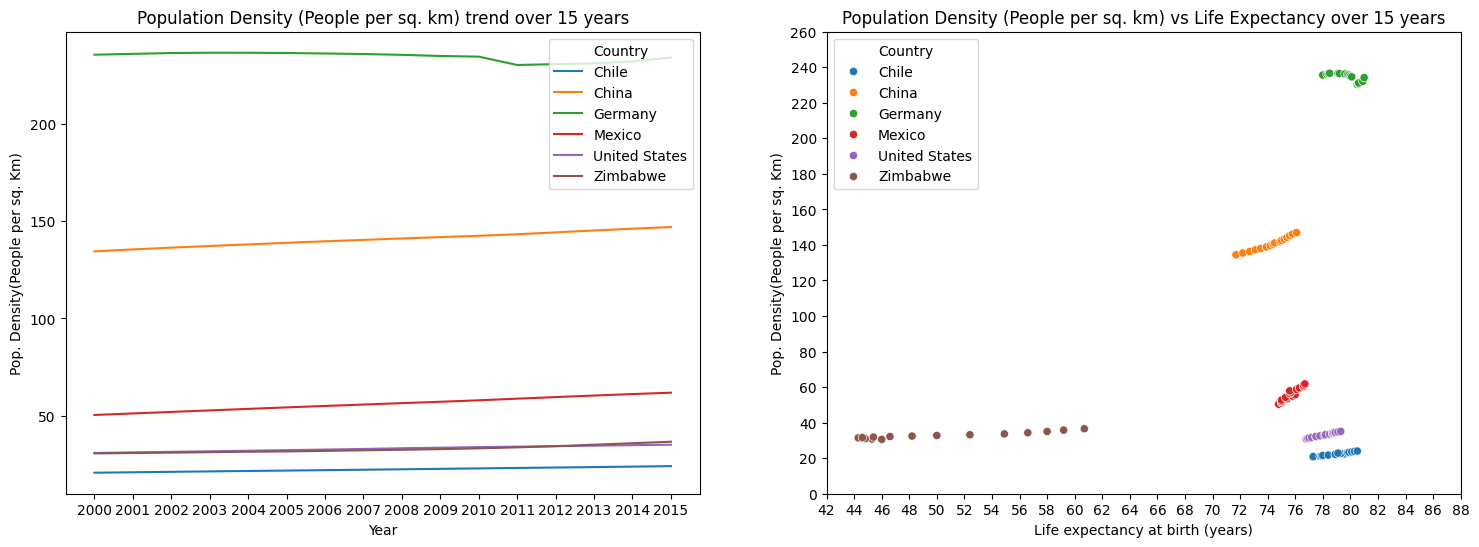

<Figure size 640x480 with 0 Axes>

In [195]:
#Population density found from https://data.worldbank.org/indicator/EN.POP.DNST - Edited to show range of 2000 - 2015 for the selected countries
#Figures in people per sq. km

pop_density = pd.read_csv('population_density.csv')
pop_density.columns = ['Year', 'Country', 'Pop. Density(People per sq. Km)']

# Setting up subplots
f, ax = plt.subplots(1, 2, figsize=(18,6))

# Plot for Figure 6
plt.subplot(1, 2, 1)
sns.lineplot(data=pop_density, x = 'Year', y='Pop. Density(People per sq. Km)', hue='Country')
plt.xticks(range(2000, 2016, 1))
plt.title('Population Density (People per sq. km) trend over 15 years')

# Plot for Figure 7
plt.subplot(1, 2, 2)
trimmed_df = life[['Life expectancy at birth (years)', 'GDP']]
pop_dens_gdp = pd.concat([pop_density, trimmed_df], axis=1)
sns.scatterplot(data=pop_dens_gdp, y= 'Pop. Density(People per sq. Km)', x = 'Life expectancy at birth (years)', hue = 'Country')
plt.title('Population Density (People per sq. km) vs Life Expectancy over 15 years')
plt.yticks(range(0, 270, 20))
plt.xticks(range(42, 89, 2))

plt.show()
plt.clf()

# **Observations**
---

After plotting the tables from the data researched online, and then the same data vs the life expectancy figures for the same time periods for the same countries, I can safely say that the population density of each of the countries has had little to no impact on the life expectancy figure.

So with this, I can confirm the null hypothesis of 'Population density does not impact life expectancy' because the minimal changes in the Population density trends on a horizonal line vs the life expectancy figures. This shows that, although the life expectancy has increased, the population density has not.